In [1]:
# House price prediction using regression Algorithm...
# regression Algorithm - predicting continuous discreate values

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # library-for data visualization 
import seaborn as sns         # library-for data visualization

In [3]:
df = pd.read_csv("House price prediction dataset.csv")

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.shape

(4600, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
 df.isnull().sum()
# After collecting information, we came to know that there is no null values in the dataset...

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
# There is no null values, so finding unique values count in each values...
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [10]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [11]:
#for finding correlation factor, the columns in df which are not in numeric type are converted to numeric...  
#Converting the columns into numeric using pandas to_numeric functions...
df['date'] = pd.to_numeric(df['date'], errors='coerce') 

df['street'] = pd.to_numeric(df['street'],errors='coerce') 

df['city'] = pd.to_numeric(df['city'],errors= 'coerce')

df['statezip'] = pd.to_numeric(df['statezip'], errors='coerce')

df['country'] = pd.to_numeric(df['country'], errors='coerce')

In [12]:
# #dropping columns which are not in numeric type to obtain better correlation factor
# df.drop('date', axis=1, inplace=True)
# df.drop('street', axis=1,inplace=True)
# df.drop('city',axis=1, inplace=True)
# df.drop('statezip', axis=1, inplace=True)
# df.drop('country',axis=1, inplace=True)

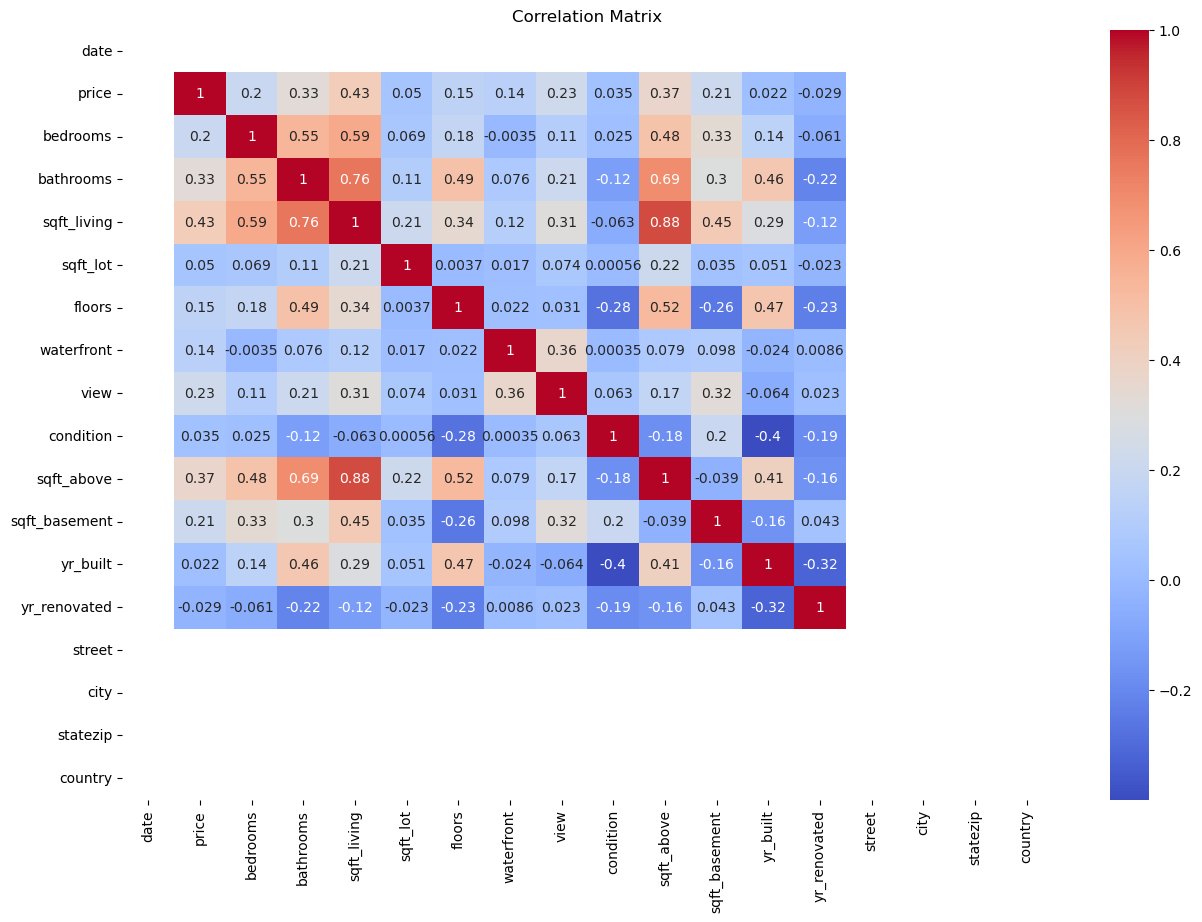

In [13]:
df_corr = df.corr()
plt.figure(figsize= (15,10))
sns.heatmap(df_corr,annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
# if the correlated values is '1' - best correlation, or 'near to 1'- better correlation, (increase --> increases)
# whereas if the correlated negative value near to -0.8,-0.9 means is also better correlation in a opposite way (increase--> decrease)
# if the correaltion is near to '0' means ,then there is no correlation...

In [15]:
# The dataframe consists some extra columns which we don't needed...
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [16]:
#To train ML model good, we don't need extra columns like, date, yr_nenovated, street, city, statezip, country...
#so dropping the extra columns...
columns_to_remove = ['date','yr_renovated','street','city','statezip','country']
df = df.drop(columns=columns_to_remove)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976


In [48]:
# Now we have only 12 columns after dropping...
# Dropping is done based on info, because Only required features(columns) are used for model training whereas the others are
# features(columns) are dropped inorder to reduce the dimensions for better performance...

In [38]:
#to check outliers in our dataset.
# using z-score we can find the outliers, and z-score is in statistics.so importing stats...
import scipy.stats as stats

In [40]:
# z-score - Measures a standard deviaiton of each numerical columns in the dataset...
z_scores = stats.zscore(df)
#setting threshold value...
#threshold value - helps to identify the outliers (i.e., if the datapoints are greater than threshold value means, 
#then that respective datapoint are considered as a outliers...)
threshold = 3
print("size before removing outliers: ",df.shape)
outliers_df = df[(z_scores > threshold). any(axis=1)]
df = df[(z_scores <= threshold).all(axis=1)]
print("size after removing outliers: ",df.shape)

size before removing outliers:  (4600, 12)
size after removing outliers:  (4244, 12)


In [44]:
outliers_df.head()  #outliers are considered as noisy datas which makes model poor performance....

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921
56,491500.0,4,1.75,2190,125452,1.0,0,2,3,2190,0,1968
100,736500.0,4,2.50,3180,21904,2.0,0,3,3,3180,0,2000
107,1090000.0,4,2.50,4340,141570,2.5,0,0,3,4340,0,1992
118,1030000.0,5,2.75,3190,16920,1.0,0,3,3,1690,1500,1976


# Data preprocessing:
1. Normalization
2. standarization

In [50]:
# using StandardScaler we doing feature preprocessing...
from sklearn.preprocessing import StandardScaler

In [54]:
# StandardScaler --> deletes mean values of all features and convert all features in a unique scale...
scaler = StandardScaler()

In [64]:
# Data is fitted into StandardScaler to change the data...
scaler.fit(df)  # fit - learning all the scalered Data patterns
# fitted data is now transformed into new dataframe
df_scaled = pd.DataFrame(scaler.transform(df),columns= df.columns)    #transform - implementing all the Data patterns that are fitted 
# columns = df.columns ----> parameters indicating to transform all the columns in the dataframe

In [66]:
# Now all the Data features are standarized (i.e., all Data features are in same unique scale)

Building a model

In [68]:
from sklearn.model_selection import train_test_split

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [74]:
from sklearn.linear_model import LinearRegression

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
#splitting the dataset into x(datafeatures) and y(target)
x = df.drop('price', axis=1)
y = df['price']

In [82]:
# splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [88]:
# printing to find the size of train and test dataset
print(f"'x_train {x_train.shape}")
print(f"'x_test {x_test.shape}")
print(f"'y_train {y_train.shape}")
print(f"'y_test {y_test.shape}")

'x_train (3183, 11)
'x_test (1061, 11)
'y_train (3183,)
'y_test (1061,)


In [93]:
# storing all the model Algorithms in the model array
models = [
    ('KNN',KNeighborsRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor())
]

In [97]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [101]:
for name,model in models:
    print(name, model)
    print()
    model.fit(x_train,y_train)  # model training
    y_pred = model.predict(x_test)  # model testing
    #printing all metrices to evaluate the differences of performance between y_test and y_pred...
    print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))
    print("\n")
    print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
    print("\n")
    print("R-Squared(r2): ", r2_score(y_test,y_pred))
    print("\n")

KNN KNeighborsRegressor()

Mean Squared Error:  54270710864.461784


Mean Absolute Error:  155957.74907360977


R-Squared(r2):  0.27234975814918927


Linear Regression LinearRegression()

Mean Squared Error:  41194072741.010506


Mean Absolute Error:  139590.9560072164


R-Squared(r2):  0.4476785633474224


Decision Tree DecisionTreeRegressor()

Mean Squared Error:  71617599340.55566


Mean Absolute Error:  184597.30942780396


R-Squared(r2):  0.03976633711177746


Random Forest RandomForestRegressor()

Mean Squared Error:  44223339677.66238


Mean Absolute Error:  142044.13984394312


R-Squared(r2):  0.40706279134122214




In [ ]:
# If the Mean squared error and Mean absolute error values are lower means, then the model performance is good and considered as good model....
# Whereas Mean squared error and Mean absolute error values are higher means, then the model performance is poor and considered as poor model....

# If the R-Squared (r2) value is higher means, then the model performance is good....


In [ ]:
#conclusion : By comparing all the models matrices values, linear regression is the best model. Whereas the other models are need to tune...